In [0]:
import math
import numpy as np
import pandas as pd

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf

In [4]:
# temporariliy suppress deprecation warnings (https://stackoverflow.com/questions/49901806/tensorflow-importing-mnist-warnings)
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

# load mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# revert logging settings
tf.logging.set_verbosity(old_v)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist.train.images.shape

(55000, 784)

## Training

### Define tensors for the model

In [0]:
# Build neural network
X = tf.placeholder(dtype='float', shape=[None, 784], name='X')
y = tf.placeholder(dtype='float', shape=[None, 10], name='y')

cX = tf.placeholder(dtype='float', shape=[None, 784], name='cX')
cy = tf.placeholder(dtype='float', shape=[None, 10], name='cy')

#### Initialize weight and bias matrix with He Initializer (mean=0.0, stddev=sqrt(2/#in_nodes))

In [0]:
# hyper-parameters
beta = 0.001
learning_rate = 0.0002

In [7]:
weights = {
    'w1': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[784, 1024], mean=0.0, stddev=np.sqrt(2/784)), name='w1'),
    'w2': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[1024, 1024], mean=0.0, stddev=np.sqrt(2/1024)), name='w2'),
    'w3': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[1024, 1024], mean=0.0, stddev=np.sqrt(2/1024)), name='w3'),
    'w4': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[1024, 1024], mean=0.0, stddev=np.sqrt(2/1024)), name='w4'),
    'w5': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[1024, 1024], mean=0.0, stddev=np.sqrt(2/1024)), name='w5'),
    'wout': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[1024, 10], mean=0.0, stddev=np.sqrt(2/1024)), name='wout'),
}

bias_initial_value = 0.01
biases = {
    'b1': tf.Variable(initial_value=tf.ones([1024]) * bias_initial_value, name='b1'),
    'b2': tf.Variable(initial_value=tf.ones([1024]) * bias_initial_value, name='b2'),
    'b3': tf.Variable(initial_value=tf.ones([1024]) * bias_initial_value, name='b3'),
    'b4': tf.Variable(initial_value=tf.ones([1024]) * bias_initial_value, name='b4'),
    'b5': tf.Variable(initial_value=tf.ones([1024]) * bias_initial_value, name='b5'),
    'bout': tf.Variable(initial_value=tf.ones([10]) * bias_initial_value, name='bout')
}

z1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
a1 = tf.nn.relu(z1)

z2 = tf.add(tf.matmul(a1, weights['w2']), biases['b2'])
a2 = tf.nn.relu(z2)

z3 = tf.add(tf.matmul(a2, weights['w3']), biases['b3'])
a3 = tf.nn.relu(z3)

z4 = tf.add(tf.matmul(a3, weights['w4']), biases['b4'])
a4 = tf.nn.relu(z4)

z5 = tf.add(tf.matmul(a4, weights['w5']), biases['b5'])
a5 = tf.nn.relu(z5)

logits = tf.add(tf.matmul(a5, weights['wout']), biases['bout'])
output = tf.nn.softmax(logits=logits)

# losses
regularizers = tf.nn.l2_loss(weights['w1']) + tf.nn.l2_loss(weights['w2']) + tf.nn.l2_loss(weights['w3']) \
                + tf.nn.l2_loss(weights['w4']) + tf.nn.l2_loss(weights['w5']) + tf.nn.l2_loss(weights['wout'])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y) \
                + beta * regularizers)

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss=loss)

# calculate accuracy
correct = tf.equal(tf.argmax(input=logits, axis=1), tf.argmax(input=y, axis=1))
accuracy = tf.reduce_mean(tf.cast(dtype='float', x=correct))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
limit = 20

In [0]:
cweights = {
    'w1_u': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[784, limit], mean=0.0, stddev=np.sqrt(2/784)), name='cw1_u'),
    'w1_svt': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[limit, 1024], mean=0.0, stddev=np.sqrt(2/limit)), name='cw1_svt'),
    'w2_u': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[1024, limit], mean=0.0, stddev=np.sqrt(2/1024)), name='cw2_u'),
    'w2_svt': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[limit, 1024], mean=0.0, stddev=np.sqrt(2/limit)), name='cw2_svt'),
    'w3_u': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[1024, limit], mean=0.0, stddev=np.sqrt(2/1024)), name='cw3_u'),
    'w3_svt': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[limit, 1024], mean=0.0, stddev=np.sqrt(2/limit)), name='cw3_svt'),
    'w4_u': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[1024, limit], mean=0.0, stddev=np.sqrt(2/1024)), name='cw4_u'),
    'w4_svt': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[limit, 1024], mean=0.0, stddev=np.sqrt(2/limit)), name='cw4_svt'),
    'w5_u': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[1024, limit], mean=0.0, stddev=np.sqrt(2/1024)), name='cw5_u'),
    'w5_svt': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[limit, 1024], mean=0.0, stddev=np.sqrt(2/limit)), name='cw5_svt'),
    'cwout': tf.Variable(dtype='float', initial_value=tf.random_normal(shape=[1024, 10], mean=0.0, stddev=np.sqrt(2/1024)), name='cwout'),
}

cbiases = {
    'b1': tf.Variable(initial_value=tf.ones([1024]), name='cb1'),
    'b2': tf.Variable(initial_value=tf.ones([1024]), name='cb2'),
    'b3': tf.Variable(initial_value=tf.ones([1024]), name='cb3'),
    'b4': tf.Variable(initial_value=tf.ones([1024]), name='cb4'),
    'b5': tf.Variable(initial_value=tf.ones([1024]), name='cb5'),
    'cbout': tf.Variable(initial_value=tf.ones([10]), name='cbout')
}

cz1 = tf.add(tf.matmul(tf.matmul(cX, cweights['w1_u']), cweights['w1_svt']), cbiases['b1'])
ca1 = tf.nn.relu(cz1)

cz2 = tf.add(tf.matmul(tf.matmul(ca1, cweights['w2_u']), cweights['w2_svt']), cbiases['b2'])
ca2 = tf.nn.relu(cz2)

cz3 = tf.add(tf.matmul(tf.matmul(ca2, cweights['w3_u']), cweights['w3_svt']), cbiases['b3'])
ca3 = tf.nn.relu(cz3)

cz4 = tf.add(tf.matmul(tf.matmul(ca3, cweights['w4_u']), cweights['w4_svt']), cbiases['b4'])
ca4 = tf.nn.relu(cz4)

cz5 = tf.add(tf.matmul(tf.matmul(ca4, cweights['w5_u']), cweights['w5_svt']), cbiases['b5'])
ca5 = tf.nn.relu(cz5)

clogits = tf.add(tf.matmul(ca5, cweights['cwout']), cbiases['cbout'])
coutput = tf.nn.softmax(logits=clogits)

# losses
#   cregularizers = 0
#   for wt in cweights:
#     cregularizers += tf.nn.l2_loss(cweights[wt])

closs = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=clogits, labels=cy)) #\
#                   + beta * cregularizers)

ctrain = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(loss=closs)

# calculate accuracy
ccorrect = tf.equal(tf.argmax(input=clogits, axis=1), tf.argmax(input=cy, axis=1))
caccuracy = tf.reduce_mean(tf.cast(dtype='float', x=ccorrect))

#### Plug everything together

In [11]:
batch_size = 1000
num_epochs = 60
display_step = 20
log_step = 10

total_samples = mnist.train.images.shape[0]
num_batches = int(math.ceil(total_samples/batch_size))

# these lists will be used to display accuracy/loss graphs over epochs
train_acc, test_acc = [], []
train_loss, test_loss = [], []
xticks = []

sess = tf.Session()
  
sess.run(tf.global_variables_initializer())
for epoch in range(1, num_epochs + 1):
  for itr in range(num_batches):
    batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
    sess.run(train, feed_dict={X: batch_x, y: batch_y})
    
  if epoch % log_step == 0:
    trls, trac = sess.run([loss, accuracy], feed_dict={X: batch_x, y: batch_y})
    tsls, tsac = sess.run([loss, accuracy], feed_dict={X: mnist.test.images, y: mnist.test.labels})
    
    train_acc.append(trac)
    test_acc.append(tsac)
    train_loss.append(trls)
    test_loss.append(tsls)
    xticks.append(epoch)
    
  if epoch % display_step == 0:
    print(f'Epoch:{epoch}')
    print(f'Train set:\tLoss:{trls:.4f},\tAccuracy:{trac:.4f}')
    print(f'Test set:\tLoss:{tsls:.4f},\tAccuracy:{tsac:.4f}\n')

Epoch:20
Train set:	Loss:0.9229,	Accuracy:1.0000
Test set:	Loss:0.9724,	Accuracy:0.9821

Epoch:40
Train set:	Loss:0.2892,	Accuracy:1.0000
Test set:	Loss:0.3436,	Accuracy:0.9822

Epoch:60
Train set:	Loss:0.1379,	Accuracy:1.0000
Test set:	Loss:0.1950,	Accuracy:0.9810



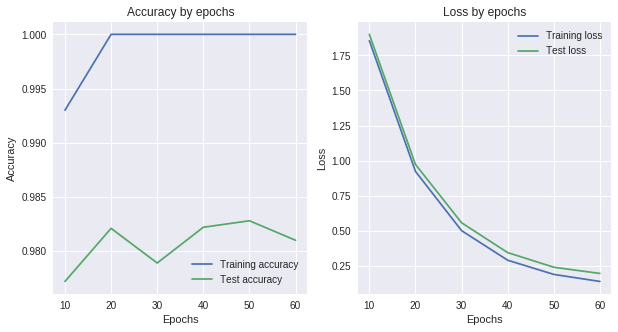

In [12]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(xticks, train_acc)
plt.plot(xticks, test_acc)
plt.title('Accuracy by epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Test accuracy'])

plt.subplot(1, 2, 2)
plt.plot(xticks, train_loss)
plt.plot(xticks, test_loss)
plt.title('Loss by epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Test loss'])

### Store values of weights

In [0]:
weights_val = {}
for w in ['w1', 'w2', 'w3', 'w4', 'w5', 'wout']:
  weights_val[w] = sess.run(weights[w])
  
biases_val = {}
for b in ['b1', 'b2', 'b3', 'b4', 'b5', 'bout']:
  biases_val[b] = sess.run(biases[b])

In [0]:
def compress_matrix(mat, limit=None):
  u, s, vt = np.linalg.svd(mat)

  if limit is None:
    sigma = np.zeros((mat.shape[0], mat.shape[1]))
    sigma[:s.shape[0], :s.shape[0]] = np.diag(s)
    return np.dot(u, np.dot(sigma, vt))    
  
  sigma = np.zeros((limit, limit))
  sigma[:limit, :limit] = np.diag(s[:limit])
  return np.dot(u[:, :limit], np.dot(sigma, vt[:limit, :]))

In [0]:
def run_compressed(sess, limit=None):
  compressed_w1 = compress_matrix(weights_val['w1'], limit)
  sess.run(weights['w1'].assign(compressed_w1))
  
  compressed_w2 = compress_matrix(weights_val['w2'], limit)
  sess.run(weights['w2'].assign(compressed_w2))
  
  compressed_w3 = compress_matrix(weights_val['w3'], limit)
  sess.run(weights['w3'].assign(compressed_w3))
  
  compressed_w4 = compress_matrix(weights_val['w4'], limit)
  sess.run(weights['w4'].assign(compressed_w4))
  
  compressed_w5 = compress_matrix(weights_val['w5'], limit)
  sess.run(weights['w5'].assign(compressed_w5))
  
  tsls, tsac = sess.run([loss, accuracy], feed_dict={X: mnist.test.images, y: mnist.test.labels})
  return tsls, tsac

In [16]:
for lm in [10, 20, 50, 100, 200, None]:
  tsls, tsac = run_compressed(sess, lm)
  print('Limit: {}\tTest loss: {:.5f}\tTest accuracy: {:.5f}'.format(lm, tsls, tsac))

Limit: 20	Test loss: 1.93006	Test accuracy: 0.55890
Limit: 20	Test loss: 1.04718	Test accuracy: 0.74960
Limit: 20	Test loss: 0.34734	Test accuracy: 0.92270
Limit: 20	Test loss: 0.21327	Test accuracy: 0.96970
Limit: 20	Test loss: 0.19329	Test accuracy: 0.98000
Limit: 20	Test loss: 0.19495	Test accuracy: 0.98100


In [0]:
def get_components(mat, limit=None):
  u, s, vt = np.linalg.svd(mat)

  if limit is None:
    sigma = np.zeros((mat.shape[0], mat.shape[1]))
    sigma[:s.shape[0], :s.shape[0]] = np.diag(s)
    return u, np.dot(sigma, vt) 
  
  sigma = np.zeros((limit, limit))
  sigma[:limit, :limit] = np.diag(s[:limit])
  return u[:, :limit], np.dot(sigma, vt[:limit, :])

### Assign values calculated by SVD to these layers

In [18]:
w1_u_val, w1_svt_val = get_components(weights_val['w1'], limit)
sess.run(cweights['w1_u'].assign(w1_u_val))
sess.run(cweights['w1_svt'].assign(w1_svt_val))

w2_u_val, w2_svt_val = get_components(weights_val['w2'], limit)
sess.run(cweights['w2_u'].assign(w2_u_val))
sess.run(cweights['w2_svt'].assign(w2_svt_val))

w3_u_val, w3_svt_val = get_components(weights_val['w3'], limit)
sess.run(cweights['w3_u'].assign(w3_u_val))
sess.run(cweights['w3_svt'].assign(w3_svt_val))

w4_u_val, w4_svt_val = get_components(weights_val['w4'], limit)
sess.run(cweights['w4_u'].assign(w4_u_val))
sess.run(cweights['w4_svt'].assign(w4_svt_val))

w5_u_val, w5_svt_val = get_components(weights_val['w5'], limit)
sess.run(cweights['w5_u'].assign(w5_u_val))
sess.run(cweights['w5_svt'].assign(w5_svt_val))

sess.run(cbiases['b1'].assign(biases_val['b1']))
sess.run(cbiases['b2'].assign(biases_val['b2']))
sess.run(cbiases['b3'].assign(biases_val['b3']))
sess.run(cbiases['b4'].assign(biases_val['b4']))
sess.run(cbiases['b5'].assign(biases_val['b5']))

array([0.00577251, 0.02202324, 0.01498394, ..., 0.02122852, 0.01504219,
       0.02237709], dtype=float32)

In [19]:
batch_size = 1000
num_epochs = 60
display_step = 20
log_step = 10

total_samples = mnist.train.images.shape[0]
num_batches = int(math.ceil(total_samples/batch_size))

# these lists will be used to display accuracy/loss graphs over epochs
train_acc, test_acc = [], []
train_loss, test_loss = [], []
xticks = []
  
for epoch in range(1, num_epochs + 1):
  for itr in range(num_batches):
    batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
    sess.run(ctrain, feed_dict={cX: batch_x, cy: batch_y})
    
  if epoch % log_step == 0:
    trls, trac = sess.run([closs, caccuracy], feed_dict={cX: batch_x, cy: batch_y})
    tsls, tsac = sess.run([closs, caccuracy], feed_dict={cX: mnist.test.images, cy: mnist.test.labels})
    
    train_acc.append(trac)
    test_acc.append(tsac)
    train_loss.append(trls)
    test_loss.append(tsls)
    xticks.append(epoch)
    
  if epoch % display_step == 0:
    print(f'Epoch:{epoch}')
    print(f'Train set:\tLoss:{trls:.4f},\tAccuracy:{trac:.4f}')
    print(f'Test set:\tLoss:{tsls:.4f},\tAccuracy:{tsac:.4f}\n')

Epoch:20
Train set:	Loss:0.0216,	Accuracy:0.9950
Test set:	Loss:0.0883,	Accuracy:0.9781

Epoch:40
Train set:	Loss:0.0016,	Accuracy:1.0000
Test set:	Loss:0.1379,	Accuracy:0.9774

Epoch:60
Train set:	Loss:0.0002,	Accuracy:1.0000
Test set:	Loss:0.1626,	Accuracy:0.9794



In [0]:
# sess.close()